In [ ]:
import pandas as pd
df = pd.read_csv('/content/cosmetics.csv')

In [ ]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

# Generate descriptive statistics
print(df.describe())


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank                                        Ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  
0            1    1       1     1          1  
1   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()



Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


In [ ]:
sensitive_skin_products = df[df['Sensitive'] == 1].sort_values(by='Price')
print(sensitive_skin_products)


            Label               Brand  \
1063    Face Mask  SEPHORA COLLECTION   
966     Face Mask  SEPHORA COLLECTION   
974     Face Mask  SEPHORA COLLECTION   
1040    Face Mask  SEPHORA COLLECTION   
961     Face Mask  SEPHORA COLLECTION   
...           ...                 ...   
170   Moisturizer            SHISEIDO   
665     Treatment           BIOEFFECT   
85    Moisturizer               FRESH   
790     Treatment            SHISEIDO   
601     Treatment              LA MER   

                                                   Name  Price  Rank  \
1063                              Nose Mask - Pineapple      3   2.9   
966                       Sleeping Mask - Coconut Water      4   5.0   
974                           Sleeping Mask - Aloe Vera      4   5.0   
1040                        After-Sun Mask - Watermelon      5   4.3   
961                            SUPERMASK - The Mud Mask      6   4.6   
...                                                 ...    ...   ...   
170

In [ ]:
oily_skin_top_rated = df[df['Oily'] == 1].sort_values(by='Rank', ascending=False)
print(oily_skin_top_rated.head())

          Label               Brand                                   Name  \
1181  Eye cream        AMOREPACIFIC        TIME RESPONSE Eye Reserve Crème   
848   Face Mask  SEPHORA COLLECTION                 Experiential Masks Set   
830   Face Mask  SEPHORA COLLECTION                        Face Mask Magic   
999   Face Mask        AMOREPACIFIC  TIME RESPONSE Vintage Wash-off Masque   
990   Face Mask          OMOROVICZA                 Midnight Radiance Mask   

      Price  Rank                                        Ingredients  \
1181    260   5.0  Camellia Sinensis Leaf Water, Butylene Glycol,...   
848      18   5.0  The Charcoal Mask: Water, Glycerin, Hydroxyeth...   
830      25   5.0  Coconut Face Mask: Water, Butylene Glycol, Gly...   
999     170   5.0  Camellia Sinensis Leaf Water, Propanediol, Gly...   
990     125   5.0  Water, Glycerin, Propanediol, Alcohol Denat., ...   

      Combination  Dry  Normal  Oily  Sensitive  
1181            1    1       1     1          0 

In [ ]:
# Example: Segmenting high-end products
high_end_products = df[df['Price'] > df['Price'].quantile(0.75)]
print(high_end_products[['Brand', 'Name', 'Price']])

                Brand                                               Name  \
0              LA MER                                    Crème de la Mer   
1               SK-II                           Facial Treatment Essence   
3              LA MER                        The Moisturizing Soft Cream   
7      DRUNK ELEPHANT                    Virgin Marula Luxury Facial Oil   
9              LA MER  Little Miss Miracle Limited-Edition Crème de l...   
...               ...                                                ...   
1424        KAPLAN MD                  Daily Moisture SPF 30 Concentrate   
1429  MDSOLARSCIENCES                Daily Anti-Aging Moisturizer SPF 30   
1436          EVE LOM   Daily Protection Broad Spectrum SPF 50 Sunscreen   
1447       PHILOSOPHY  Ultimate Miracle Worker Multi-Rejuvenating Lig...   
1454         SHISEIDO  Future Solution LX Total Protective Emulsion B...   

      Price  
0       175  
1       179  
3       175  
7        72  
9       325  
...

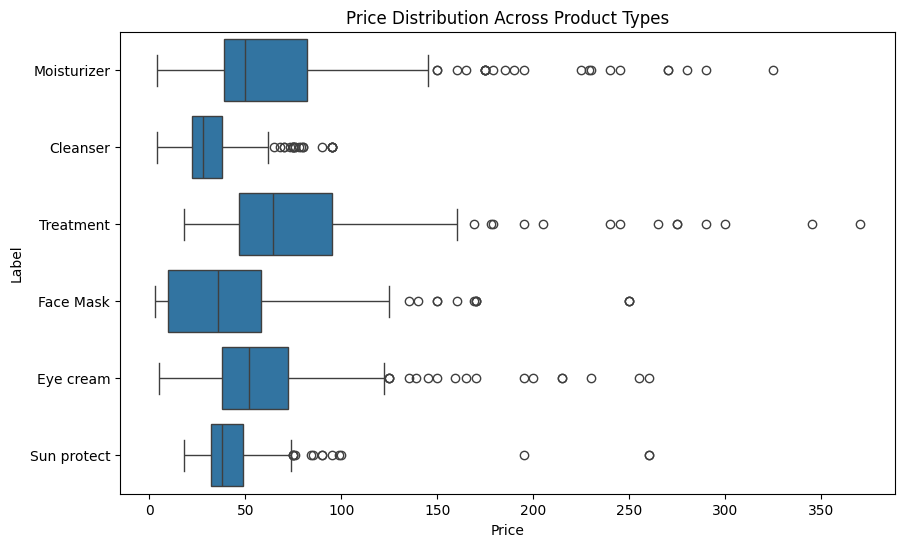

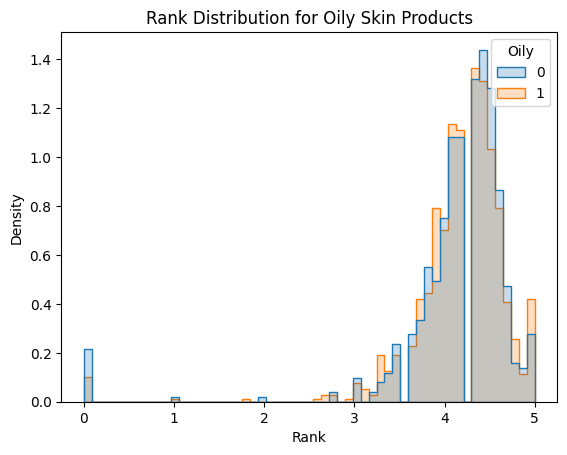

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution for each skin type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price', y='Label')
plt.title('Price Distribution Across Product Types')
plt.show()

# Rank distribution across skin types
sns.histplot(data=df, x='Rank', hue='Oily', element='step', stat='density', common_norm=False)
plt.title('Rank Distribution for Oily Skin Products')
plt.show()


In [ ]:
# Define a dictionary mapping key ingredients to skin concerns
ingredient_effect = {
    'Salicylic Acid': ['Acne-prone', 'Blackhead', 'Whitehead'],
    'Hyaluronic Acid': ['Dry', 'Wrinkle'],
    'Vitamin C': ['Dark_Circle', 'Melasma', 'PIH'],
    'Retinol': ['Wrinkle', 'Acne-prone', 'Melasma'],
    'Niacinamide': ['Dark_Circle', 'Freckles', 'PIH'],
    'Benzoyl Peroxide': ['Acne-prone', 'Papule', 'Pustule'],
    'Snail Secretion Filtrate': ['Wrinkle', 'Skin_Pore'],
    'Aloe Vera': ['Sensitive', 'Freckles'],
    'Tea Tree Oil': ['Acne-prone', 'Cyst', 'Nodule'],
    'Charcoal': ['Blackhead', 'Skin_Pore']
}

# Example of how you can expand this logic in the DataFrame
for concern in ['Acne-prone', 'Blackhead', 'Whitehead', 'Dry', 'Wrinkle', 'Dark_Circle', 'Melasma', 'PIH', 'Papule', 'Pustule', 'Skin_Pore', 'Freckles', 'Cyst', 'Nodule']:
    df[concern] = 0

# Loop through each product and check ingredients for matches in the dictionary
for index, row in df.iterrows():
    ingredients = row['Ingredients'].split(', ')
    for ingredient in ingredients:
        for key, effects in ingredient_effect.items():
            if ingredient in key:
                for effect in effects:
                    df.at[index, effect] = 1  # Set the effect to 1 if ingredient matches


In [ ]:
# Save the modified DataFrame to a CSV file
df.to_csv('updated_skincare_products.csv', index=False)


In [ ]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,Wrinkle,Dark_Circle,Melasma,PIH,Papule,Pustule,Skin_Pore,Freckles,Cyst,Nodule
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,0,1,1,...,1,1,0,1,0,0,1,1,0,0


In [ ]:
def recommend_products_for_condition(df, condition):
    return df[df[condition] == 1][['Brand', 'Name', 'Price', 'Ingredients']].sort_values(by='Price')

# Example: Find products suitable for 'Acne-prone' skin
print(recommend_products_for_condition(df, 'Dark_Circle'))


                    Brand                                               Name  \
918               FARMACY               Coconut Gel Sheet Mask - Brightening   
1051  TOO COOL FOR SCHOOL                              Coconut Ceramide Mask   
1079   SEPHORA COLLECTION                        SUPERMASK - The Primer Mask   
962             DR. JART+                 Brightening Infusion Hydrogel Mask   
1048               BOSCIA                Sake Brightening Bio-Cellulose Mask   
...                   ...                                                ...   
162                LA MER                       The Moisturizing Soft Lotion   
293                LA MER                      The Moisturizing Matte Lotion   
9                  LA MER  Little Miss Miracle Limited-Edition Crème de l...   
601                LA MER                             The Regenerating Serum   
587                LA MER                                    The Concentrate   

      Price                            

In [ ]:
import pandas as pd

def recommend_products(df, skin_types, top_n=5, sort_by='Rank', acne_prone=False, target_ingredients=None):
    """
    Recommend products based on skin type(s), acne-proneness, sorted by rank or price.

    Args:
    df (DataFrame): The product dataframe.
    skin_types (list): List of skin types to filter by.
    top_n (int): Number of top products to return.
    sort_by (str): Column to sort by, default is 'Rank'.
    acne_prone (bool): Whether to filter products suitable for acne-prone skin.
    target_ingredients (list): List of ingredients considered good for acne-prone skin.

    Returns:
    DataFrame: Top n recommended products.
    """
    # Filter the dataframe for given skin types
    condition = (df[skin_types].sum(axis=1) == len(skin_types))

    # Filter further for acne-prone suitability if specified
    if acne_prone and target_ingredients:
        condition &= df['Ingredients'].apply(lambda x: any(ingredient in x for ingredient in target_ingredients))

    filtered_df = df[condition]

    # Sort by the specified column
    recommended_df = filtered_df.sort_values(by=sort_by, ascending=True if sort_by == 'Rank' else False)

    # Select only the columns to display and return the top n results
    final_df = recommended_df[['Brand', 'Name', 'Price', 'Ingredients']].head(top_n)

    return final_df

# Example usage:
skin_types = ['Dry','Sensitive']  # Specify skin types
top_results = 3  # Number of results to display
sort_preference = 'Price'  # Sorting preference
acne_prone = True  # Specify if acne-prone skin filtering is needed
#target_ingredients = ['Salicylic Acid', 'Benzoyl Peroxide', 'Sulfur']  # Ingredients beneficial for acne-prone skin
recommendations = recommend_products(df, skin_types, top_n=top_results, sort_by=sort_preference, acne_prone=acne_prone, )
print(recommendations)


        Brand                                               Name  Price  \
601    LA MER                             The Regenerating Serum    345   
790  SHISEIDO  Future Solution LX Intensive Firming Contour S...    300   
85      FRESH                                    Crème Ancienne®    290   

                                           Ingredients  
601  Water, Algae (Seaweed) Extract, Dimethicone, H...  
790  Dimethicone, Dipropylene Glycol, Glycerin, Bis...  
85   Limnanthes Alba (Meadowfoam) Seed Oil, Water, ...  
